##2.0. EDA

As number of rows are too voluminous, we will perform high level EDA by weeks or by action type.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import json
import pyarrow.parquet as pq
%matplotlib inline

import datetime
import pytz

In [ ]:
train_click_1 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_click_1.parquet')
train_click_2 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_click_2.parquet')
train_click_3 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_click_3.parquet')
train_click_4 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_click_4.parquet')
test_click = pd.read_parquet('/content/drive/MyDrive/0.capstone/test_click.parquet')

In [ ]:
train_cart_1 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_cart_1.parquet')
train_cart_2 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_cart_2.parquet')
train_cart_3 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_cart_3.parquet')
train_cart_4 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_cart_4.parquet')
test_cart = pd.read_parquet('/content/drive/MyDrive/0.capstone/test_cart.parquet')

In [ ]:
train_order_1 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_order_1.parquet')
train_order_2 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_order_2.parquet')
train_order_3 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_order_3.parquet')
train_order_4 = pd.read_parquet('/content/drive/MyDrive/0.capstone/train_order_4.parquet')
test_order = pd.read_parquet('/content/drive/MyDrive/0.capstone/test_order.parquet')

**Top 20 Click, Cart, Orders across weeks**

In [ ]:
# fuction to consolidate the top 20 items and their values
def rank(tables):
    df = pd.DataFrame({'rank': range(1,21)})
    for i, table in enumerate(tables):
        df[f'week_{i+1}_item'] = table['aid'].value_counts().nlargest(20).index
        df[f'week_{i+1}_count'] = table['aid'].value_counts().nlargest(20).values
    return df

In [ ]:
click_tables = [train_click_1, train_click_2, train_click_3, train_click_4, test_click]
click_rank = rank(click_tables)

click_rank.head()

,rank,week_1_item,week_1_count,week_2_item,week_2_count,week_3_item,week_3_count,week_4_item,week_4_count,week_5_item,week_5_count
0,1,1083665,37103,29735,31214,959208,41802,485256,97154,1460571,8318
1,2,1460571,30832,1733943,28748,1603001,36410,1460571,34501,485256,7055
2,3,29735,28680,108125,28385,108125,32249,1551213,32173,108125,6115
3,4,670006,28198,1460571,27254,1460571,28700,108125,29392,986164,4014
4,5,1502122,27638,1052212,27253,1164334,25263,1406660,27998,1551213,3574


In [ ]:
cart_tables = [train_cart_1, train_cart_2, train_cart_3, train_cart_4, test_cart]
cart_rank = rank(cart_tables)

cart_rank.head()

,rank,week_1_item,week_1_count,week_2_item,week_2_count,week_3_item,week_3_count,week_4_item,week_4_count,week_5_item,week_5_count
0,1,152547,9821,166037,3859,166037,3416,485256,29682,485256,2001
1,2,33343,7016,1733943,3756,1603001,3383,152547,8715,33343,528
2,3,1562705,5332,29735,3615,1108416,3122,33343,7710,1460571,482
3,4,1083665,4192,231487,3381,1022566,2540,613493,6109,986164,481
4,5,231487,3482,832192,2750,1733943,2410,876493,3521,554660,447


In [ ]:
order_tables = [train_order_1, train_order_2, train_order_3, train_order_4, test_order]
order_rank = rank(order_tables)

order_rank.head()

,rank,week_1_item,week_1_count,week_2_item,week_2_count,week_3_item,week_3_count,week_4_item,week_4_count,week_5_item,week_5_count
0,1,231487,1512,231487,1507,1603001,1434,876493,1638,986164,74
1,2,1083665,1509,1629608,1118,166037,1005,1406660,1089,1460571,70
2,3,80222,1061,166037,1111,231487,839,122983,1006,329725,54
3,4,1629608,981,1733943,1033,1733943,783,1445562,869,1043508,54
4,5,1733943,918,450505,828,1022566,767,1531805,809,332654,47


**Recurring Items by Week**

In [ ]:

def bump_chart(df_rank, week_item, type, week):
  # Define order of the weeks
  week_order = ['week_1_item', 'week_2_item', 'week_3_item', 'week_4_item', 'week_5_item']
  new_cols = ['rank'] + week_order

  # Select columns for the bump chart
  bump_df = df_rank[new_cols]

  # Map original column names to the new order
  bump_df = bump_df[new_cols].rename(columns=dict(zip(week_order, range(1, 6))))

  # Melt data to a long format
  bump_df = bump_df.melt(id_vars='rank', var_name='week', value_name='item')

  # Group data by item and week and get rank for each item in each week
  item_ranks = bump_df.groupby(['item', 'week'])['rank'].mean().reset_index()

  # Create the line plot for each item
  sns.set(style="whitegrid")
  plt.figure(figsize=(8, 6))
  for item in df_rank[week_item].values:
      item_data = item_ranks[item_ranks['item'] == item]
      sns.lineplot(x='week', y='rank', data=item_data, label=item, marker='o')
  plt.legend(title='Item', loc='center right', bbox_to_anchor=(1.2, 0.5))
  plt.title(f'Top 20 Items Ranked by {type} (Week {week})')
  plt.xticks(range(1, 6))
  plt.yticks(range(1, 21))
  plt.xlabel('Week')
  plt.ylabel('Rank')
  plt.gca().invert_yaxis();

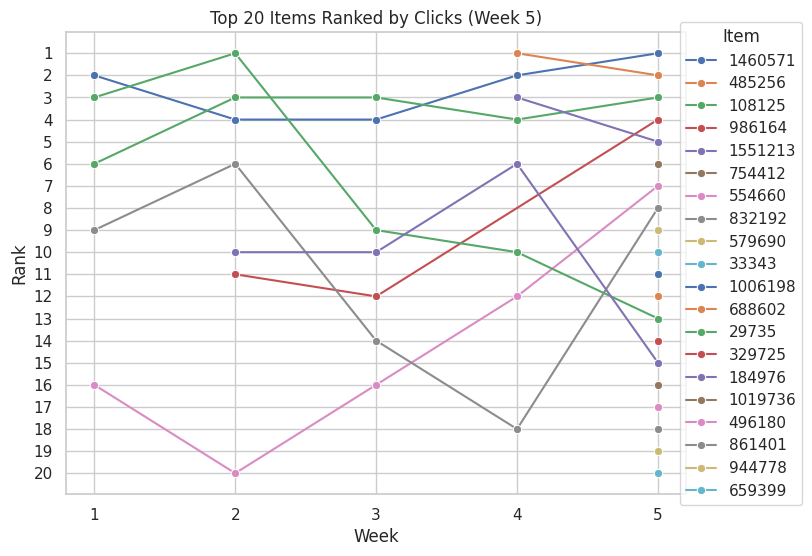

In [ ]:
bump_chart(click_rank, 'week_5_item', 'Clicks', 5)

Top 20 Clicked Items in Week 5:
- 8 clicks from Week 4 Top 20 (1460571, 485256, 108125, 1551213, 554660, 832192, 29735, 184976)
- 1 click from Earlier Weeks Top 20 (986164)

Orders consistently in top 20:
- 1460571, 108125, 986164, 554660, 832192, 29735, 184976

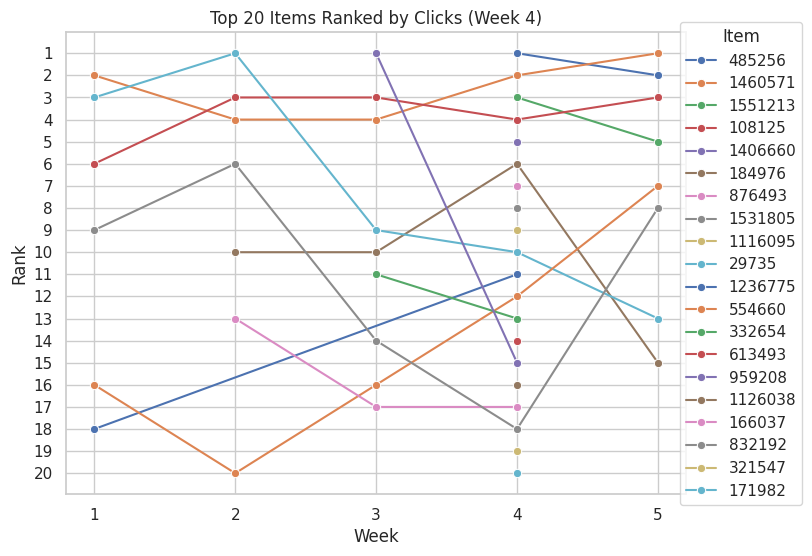

In [ ]:
bump_chart(click_rank, 'week_4_item', 'Clicks', 4)

Top Clicked Items not seen in Week 5 Top 20 but might appear based on Week 4:
- 166037

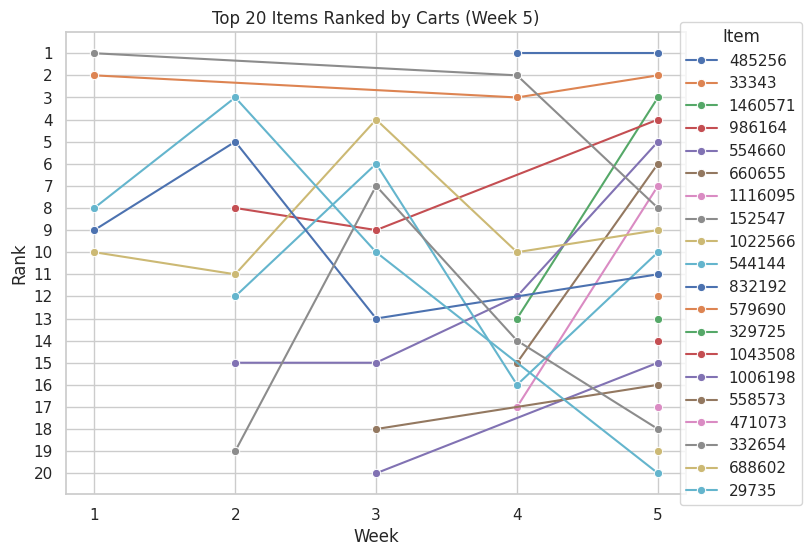

In [ ]:
bump_chart(cart_rank, 'week_5_item', 'Carts', 5)

Top 20 Carted Items in Week 5:
- 11 carts from Week 4 Top 20 (485256, 33343, 1460571, 554660, 660655, 1116095, 152547, 1022566, 544144, 832192)
- 4 order from Earlier Weeks Top 20 (986164, 1006198, 558573, 29735)

Orders consistently in top 20:
- 33343, 986164, 554660, 152547, 1022566, 544144, 832192, 332654, 29735

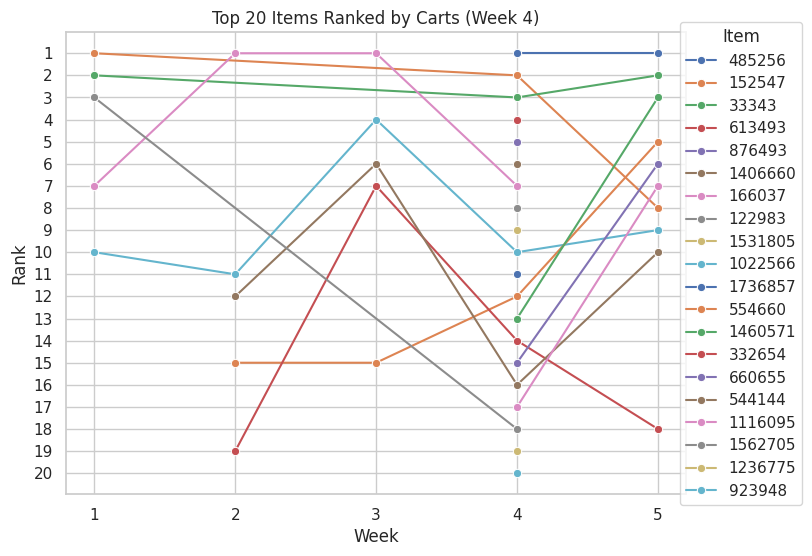

In [ ]:
bump_chart(cart_rank, 'week_4_item', 'Carts', 4)

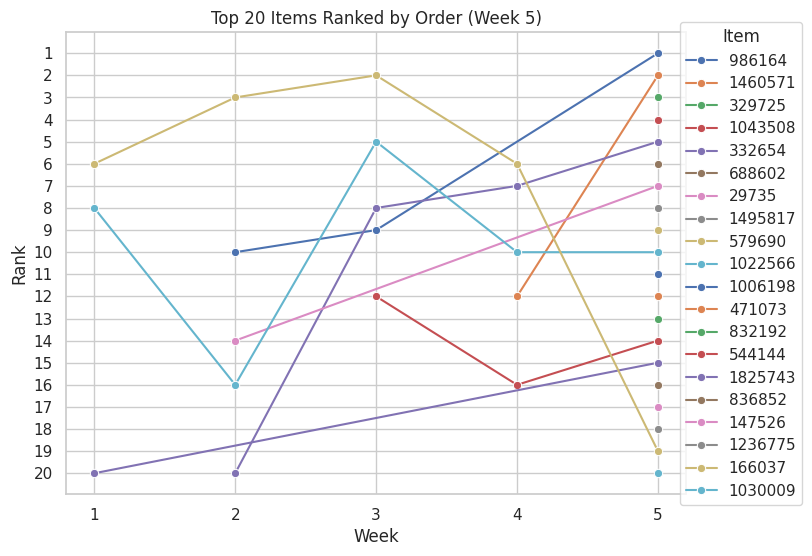

In [ ]:
bump_chart(order_rank, 'week_5_item', 'Order', 5)

Top 20 Ordered Items in Week 5:
- 3 orders from Week 4 Top 20 (1460571, 332654, 1022566, 544144 166037)
- 3 orders from Earlier Weeks Top 20 (986164, 29735, 1825743)

Orders consistently in top 20:
- 986164, 332654, 1022566, 544144, 166037

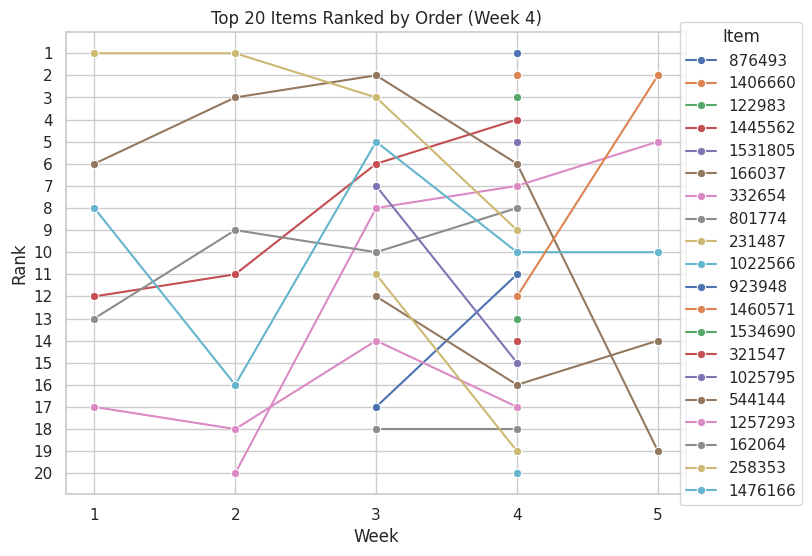

In [ ]:
bump_chart(order_rank, 'week_4_item', 'Order', 4)

Top Ordered Items not seen in Week 5 Top 20 but might appear based on Week 4:
- 1445562, 231487, 1257293

Recency is a huge factor in recurring top products. There are more recurring top 20 items in the preceding week compared to more than 1 week ago.

**Top 20 Clicks, Carts, Orders in Week 5**

In [ ]:
week_5_rank = click_rank[['rank', 'week_5_item', 'week_5_count']]
week_5_rank = pd.concat([week_5_rank, cart_rank[['week_5_item', 'week_5_count']]], axis=1)
week_5_rank = pd.concat([week_5_rank, order_rank[['week_5_item', 'week_5_count']]], axis=1)


new_columns = ['rank', 'click_week_5_item', 'click_week_5_count', 'cart_week_5_item', 'cart_week_5_count', 'order_week_5_item', 'order_week_5_count']
week_5_rank.columns = new_columns
week_5_rank.head()

,rank,click_week_5_item,click_week_5_count,cart_week_5_item,cart_week_5_count,order_week_5_item,order_week_5_count
0,1,1460571,8318,485256,2001,986164,74
1,2,485256,7055,33343,528,1460571,70
2,3,108125,6115,1460571,482,329725,54
3,4,986164,4014,986164,481,1043508,54
4,5,1551213,3574,554660,447,332654,47


In [ ]:
def bump_chart(df_rank_week, aid_x, aid_y, aid_x_name, aid_y_name, week_number):
  # Define order of the weeks
  week_order = [aid_x, aid_y]
  new_cols = ['rank'] + week_order

  # Select columns for the bump chart
  bump_df = df_rank_week[new_cols]

  # Map original column names to the new order
  bump_df = bump_df[new_cols].rename(columns=dict(zip(week_order, range(1, 6))))

  # Melt data to a long format
  bump_df = bump_df.melt(id_vars='rank', var_name='week', value_name='item')

  # Group data by item and week and get rank for each item in each week
  item_ranks = bump_df.groupby(['item', 'week'])['rank'].mean().reset_index()

  # Create the line plot for each item
  sns.set(style="whitegrid")
  plt.figure(figsize=(8, 6))
  for item in df_rank_week[aid_y].values:
      item_data = item_ranks[item_ranks['item'] == item]
      sns.lineplot(x='week', y='rank', data=item_data, label=item, marker='o')
  plt.legend(title='Item', loc='center right', bbox_to_anchor=(1.2, 0.5))
  plt.title(f'Top 20 Items {aid_x_name}-{aid_y_name}, Week {week_number}')
  plt.xticks(range(1,3))
  plt.yticks(range(1, 21))
  plt.xlabel(f'{aid_x_name}-{aid_y_name}')
  plt.ylabel('Rank')
  plt.gca().invert_yaxis();

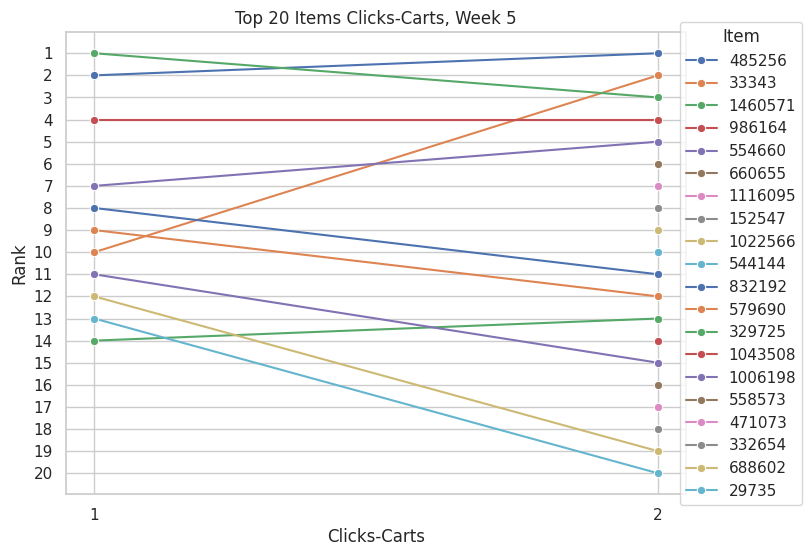

In [ ]:
bump_chart(week_5_rank, 'click_week_5_item', 'cart_week_5_item', 'Clicks', 'Carts', 5)

11 Top 20-Top 20 click-to-carts from week 5

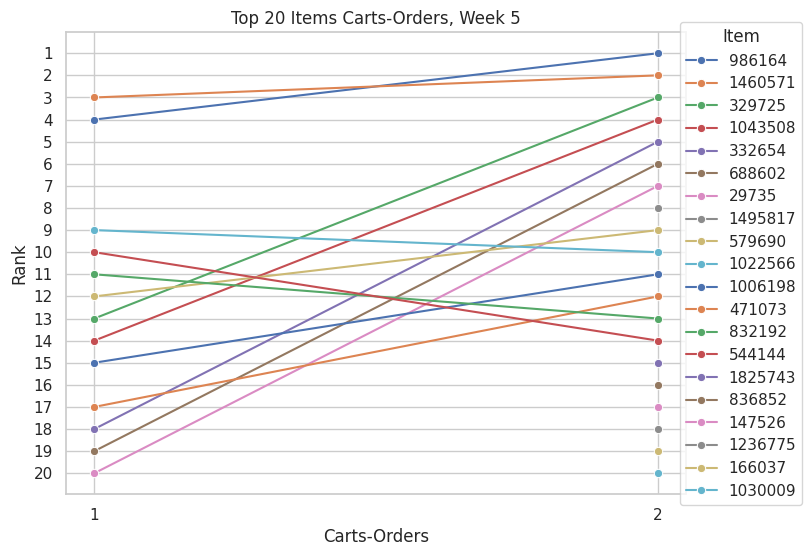

In [ ]:
bump_chart(week_5_rank, 'cart_week_5_item', 'order_week_5_item', 'Carts', 'Orders', 5)

13 Top 20-Top 20 cart-to-orders from week 5

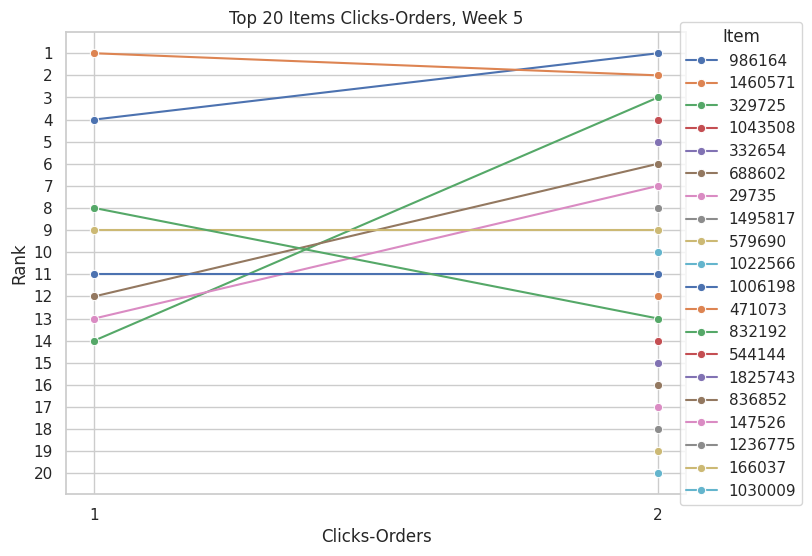

In [ ]:
bump_chart(week_5_rank, 'click_week_5_item', 'order_week_5_item', 'Clicks', 'Orders', 5)

8 Top 20-Top 20 order-to-carts from week 5

**Top 20 Clicks, Carts, Orders in Week 4**

In [ ]:
week_4_rank = click_rank[['rank', 'week_4_item', 'week_4_count']]
week_4_rank = pd.concat([week_4_rank, cart_rank[['week_4_item', 'week_4_count']]], axis=1)
week_4_rank = pd.concat([week_4_rank, order_rank[['week_4_item', 'week_4_count']]], axis=1)


new_columns = ['rank', 'click_week_4_item', 'click_week_4_count', 'cart_week_4_item', 'cart_week_4_count', 'order_week_4_item', 'order_week_4_count']
week_4_rank.columns = new_columns
week_4_rank.head()

,rank,click_week_4_item,click_week_4_count,cart_week_4_item,cart_week_4_count,order_week_4_item,order_week_4_count
0,1,485256,97154,485256,29682,876493,1638
1,2,1460571,34501,152547,8715,1406660,1089
2,3,1551213,32173,33343,7710,122983,1006
3,4,108125,29392,613493,6109,1445562,869
4,5,1406660,27998,876493,3521,1531805,809


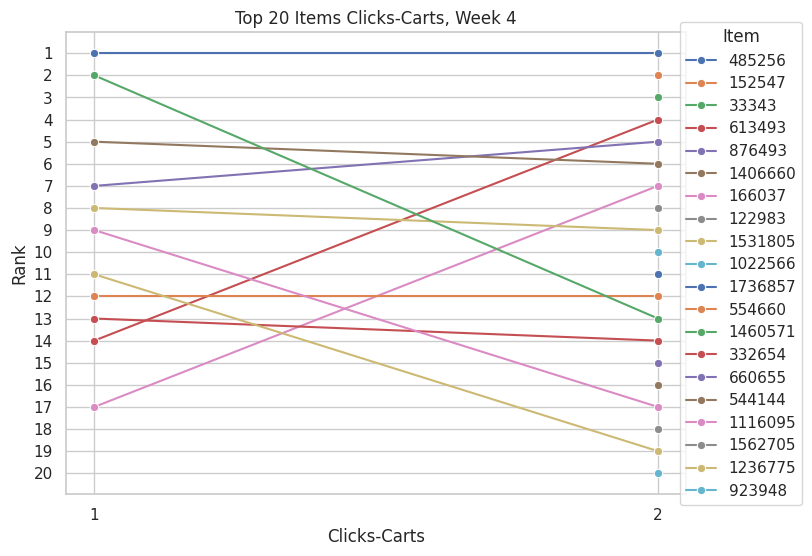

In [ ]:
bump_chart(week_4_rank, 'click_week_4_item', 'cart_week_4_item', 'Clicks', 'Carts', 4)

11 Top 20-Top 20 click-to-carts from week 4

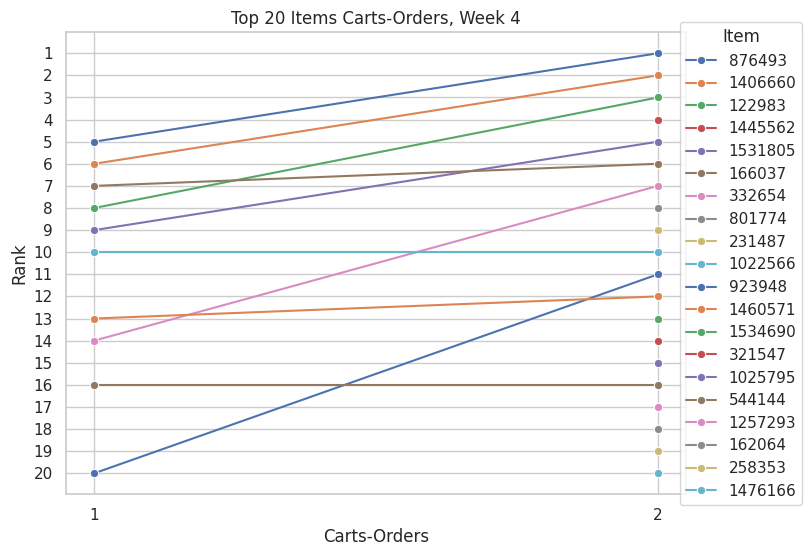

In [ ]:
bump_chart(week_4_rank, 'cart_week_4_item', 'order_week_4_item', 'Carts', 'Orders', 4)

10 Top 20-Top 20 cart-to-orders from week 4

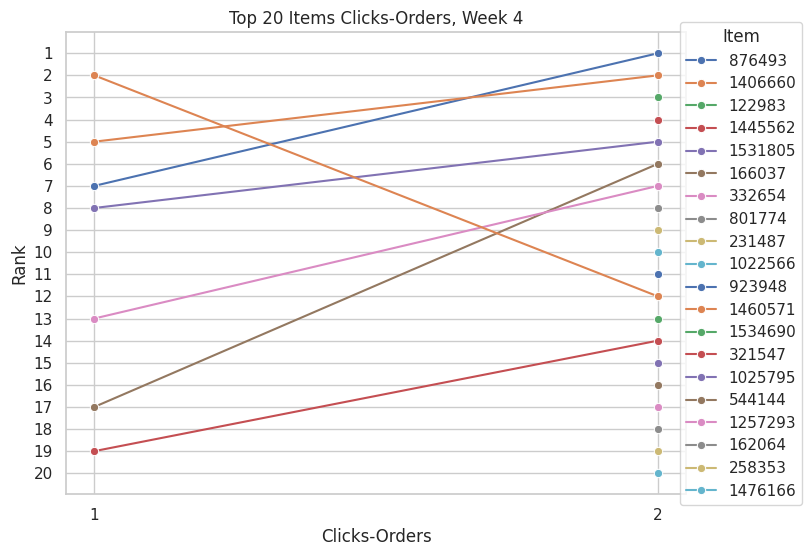

In [ ]:
bump_chart(week_4_rank, 'click_week_4_item', 'order_week_4_item', 'Clicks', 'Orders', 4)

7 Top 20-Top 20 clicks-to-orders from week 4

**Intersection between Aids in Week**

In [ ]:
def intersections(table, column_1, column_2):
  return sorted(set(table[column_1]).intersection(set(table[column_2])))

In [ ]:
click_cart_week_4 = intersections(week_4_rank, 'click_week_4_item', 'cart_week_4_item')
click_cart_week_4

[166037,
 332654,
 485256,
 554660,
 613493,
 876493,
 1116095,
 1236775,
 1406660,
 1460571,
 1531805]

In [ ]:
cart_order_week_4 = intersections(week_4_rank, 'cart_week_4_item', 'order_week_4_item')
cart_order_week_4

[122983,
 166037,
 332654,
 544144,
 876493,
 923948,
 1022566,
 1406660,
 1460571,
 1531805]

In [ ]:
click_order_week_4 = intersections(week_4_rank, 'click_week_4_item', 'order_week_4_item')
click_order_week_4

[166037, 321547, 332654, 876493, 1406660, 1460571, 1531805]

In [ ]:
click_cart_week_5 = intersections(week_5_rank, 'click_week_5_item', 'cart_week_5_item')
click_cart_week_5

[29735,
 33343,
 329725,
 485256,
 554660,
 579690,
 688602,
 832192,
 986164,
 1006198,
 1460571]

In [ ]:
cart_order_week_5 = intersections(week_5_rank, 'cart_week_5_item', 'order_week_5_item')
cart_order_week_5

[29735,
 329725,
 332654,
 471073,
 544144,
 579690,
 688602,
 832192,
 986164,
 1006198,
 1022566,
 1043508,
 1460571]

In [ ]:
click_order_week_5 = intersections(week_5_rank, 'click_week_5_item', 'order_week_5_item')
click_order_week_5

[29735, 329725, 579690, 688602, 832192, 986164, 1006198, 1460571]

Some items have strange behaviour. For example 485256 is top 20 click and cart, but fall below that for orders. This could be due to ads pushing the clicks and carts, but this did not convert to orders. As this product is top 20 for only 2 weeks, it could be ads that pushed it up for the 2 weeks.

Popularity of clicks may lead to carts but not necessarily orders.

**Intersection between Weeks by Aids**

In [ ]:
click_week_4_5 = intersections(click_rank, 'week_4_item', 'week_5_item')
click_week_4_5

[29735, 108125, 184976, 485256, 554660, 832192, 1460571, 1551213]

In [ ]:
cart_week_4_5 = intersections(cart_rank, 'week_4_item', 'week_5_item')
cart_week_4_5

[33343,
 152547,
 332654,
 485256,
 544144,
 554660,
 660655,
 1022566,
 1116095,
 1460571]

In [ ]:
order_week_4_5 = intersections(order_rank, 'week_4_item', 'week_5_item')
order_week_4_5

[166037, 332654, 544144, 1022566, 1460571]

- click: 8 recurring top 20 items from week 4 to week 5
- cart: 10 recurring top 20 items from week 4 to week 5
- order: only 5 recurring

Orders may be more sensitive to recency compared to carts and clicks. For example, top orders for that period may be a result of promotions boosting it's popularity temporarily.

**Export preprocessed dataframes as parquet**

In [ ]:
# click_rank.to_parquet('/content/drive/MyDrive/0.capstone/preprocessed/click_rank.parquet')
# cart_rank.to_parquet('/content/drive/MyDrive/0.capstone/preprocessed/cart_rank.parquet')
# order_rank.to_parquet('/content/drive/MyDrive/0.capstone/preprocessed/order_rank.parquet')

# week_4_rank.to_parquet('/content/drive/MyDrive/0.capstone/preprocessed/week_4_rank.parquet')
# week_5_rank.to_parquet('/content/drive/MyDrive/0.capstone/preprocessed/week_5_rank.parquet')

**Summary**

Recency is a huge factor in recurring top products. There are more recurring top 20 items in the preceding week compared to more than 1 week ago. If that is the case when looking at weeks, it would also matter when looking at shorter time periods (minutes / hours / days).

Clicks and carts may not translate to orders. One cause could be that these are artifically boosted by advertising but does not convert to actual orders.

There may be orders of certain products boosted during certain periods, as a result of discounts/promotion or happenings (e.g. holidays, festivities).

In short, we have to consider recency and period/timing in building the model.  